<a href="https://colab.research.google.com/github/varunsboy17/Stock-Prediction/blob/master/StockPrediction_LSTM_Ridge_GB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
%matplotlib inline

from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense

from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor

from tensorflow.keras.losses import Huber

Using TensorFlow backend.


In [0]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 10, 1)

In [0]:
df = web.DataReader("tsla", "yahoo", start, end)
#df = web.DataReader("AAPL", "yahoo", start, end)

In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-29,223.399994,218.000000,219.000000,221.710007,5179500,221.710007
2019-08-30,232.440002,224.210007,229.149994,225.610001,9320600,225.610001
2019-09-03,228.949997,223.160004,224.080002,225.009995,5354100,225.009995
2019-09-04,228.460007,219.210007,226.889999,220.679993,5761000,220.679993
2019-09-05,229.750000,220.850006,222.500000,229.580002,7403322,229.580002


In [6]:
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2019-08-22', '2019-08-23', '2019-08-26', '2019-08-27',
               '2019-08-28', '2019-08-29', '2019-08-30', '2019-09-03',
               '2019-09-04', '2019-09-05'],
              dtype='datetime64[ns]', name='Date', length=2313, freq=None)

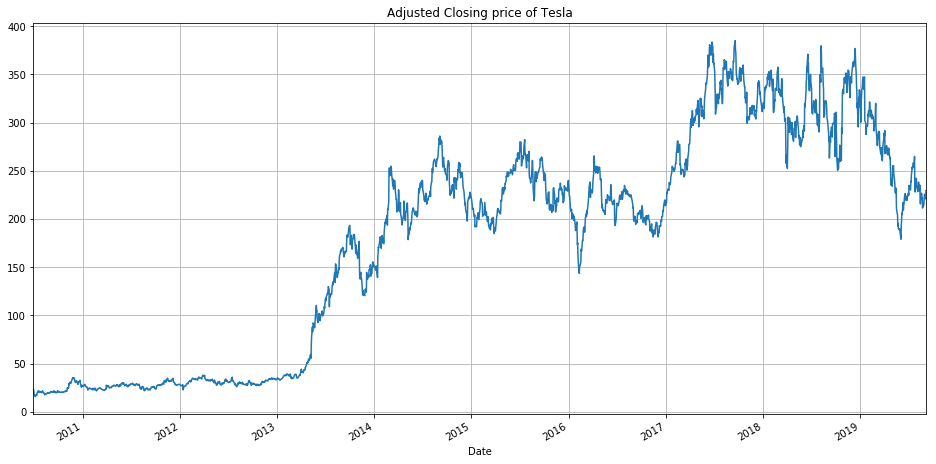

In [7]:
df['Adj Close'].plot(label='TSLA', figsize = (16,8), title='Adjusted Closing price of Tesla', grid=True)
plt.show()

In [0]:
window_size=32
num_samples=len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

In [0]:
# 2D Matrix of training data
data = df['Adj Close'].values[indices]

In [10]:
data

array([[ 23.88999939,  23.82999992,  21.95999908, ...,  17.89999962,
         17.60000038,  18.31999969],
       [ 23.82999992,  21.95999908,  19.20000076, ...,  17.60000038,
         18.31999969,  18.78000069],
       [ 21.95999908,  19.20000076,  16.11000061, ...,  18.31999969,
         18.78000069,  19.14999962],
       ...,
       [253.53999329, 258.17999268, 255.67999268, ..., 221.71000671,
        225.61000061, 225.00999451],
       [258.17999268, 255.67999268, 260.17001343, ..., 225.61000061,
        225.00999451, 220.67999268],
       [255.67999268, 260.17001343, 264.88000488, ..., 225.00999451,
        220.67999268, 229.58000183]])

In [0]:
X = data[:,:-1]
y = data[:,-1]

In [0]:
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
X_test = X[ind_split:]
y_train = y[:ind_split]
y_test = y[ind_split:]

In [13]:
X_test.shape

(457, 32)

In [14]:
# Ridge regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

In [16]:
len(y_pred_train_ridge)

1824

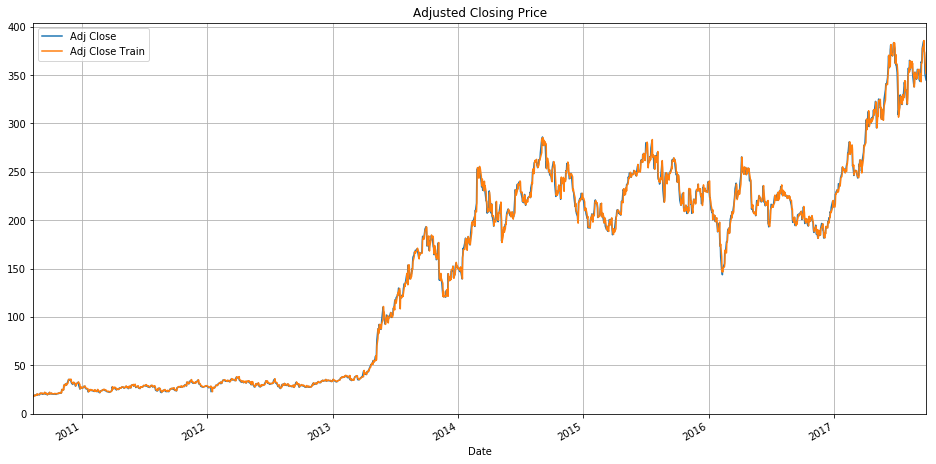

In [17]:
df_ridge = df.copy()
df_ridge.drop(['Open','High','Low','Close','Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size:ind_split]
df_ridge['Adj Close Train'] = y_pred_train_ridge[:-window_size]
df_ridge.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

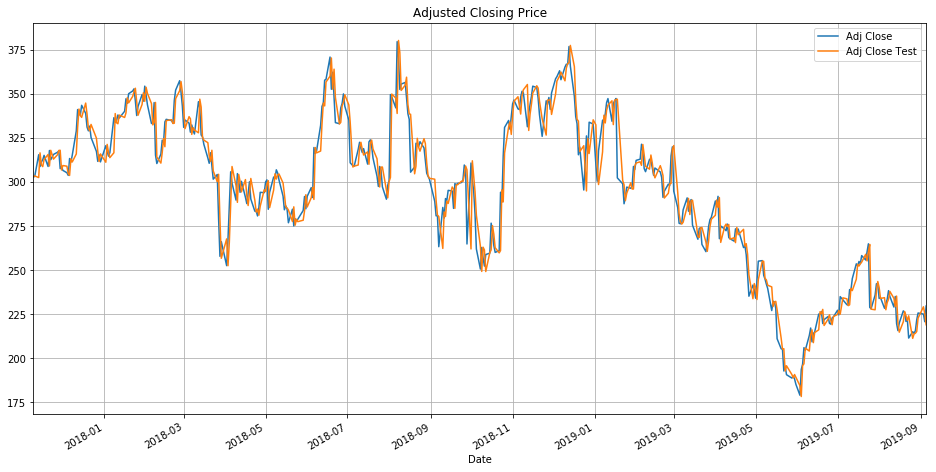

In [18]:
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[ind_split+window_size:]
df_ridge['Adj Close Test'] = y_pred_ridge
df_ridge.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [19]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred_train_gb = gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_test)

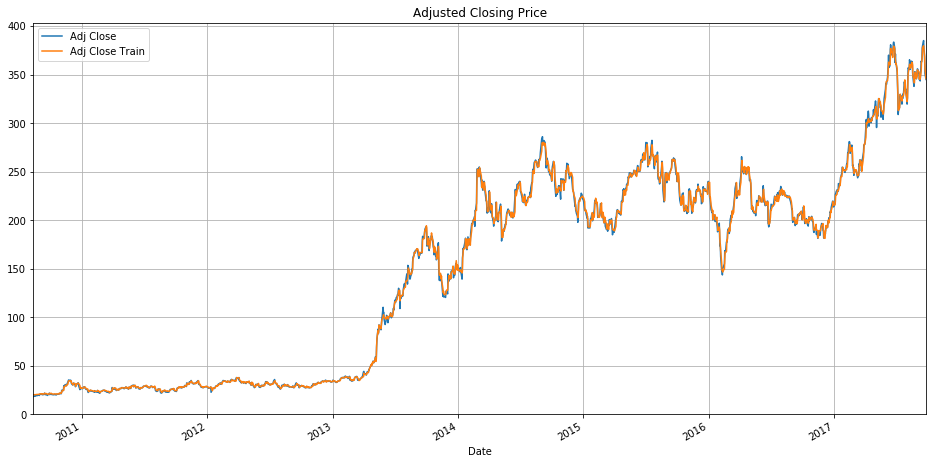

In [21]:
df_gb = df.copy()
df_gb.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[window_size:ind_split]
df_gb['Adj Close Train'] = y_pred_train_gb[:-window_size]
df_gb.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

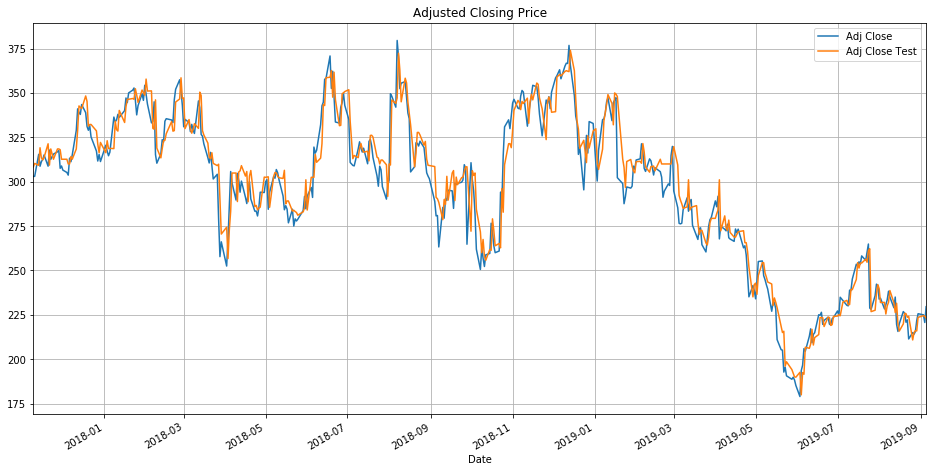

In [22]:
# Same for the test
df_gb = df.copy()
df_gb.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_gb['Adj Close Test'] = y_pred_gb
df_gb.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [23]:
# Using neural network with 1D Convolutional and LSTM layers
model = Sequential([Conv1D(filters=128, kernel_size=5, input_shape=(window_size,1), strides=1, padding="causal", activation="tanh"),
                   Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="tanh"),
                   LSTM(128, return_sequences=True),
                   LSTM(128),
                   Dense(64, activation="tanh"),
                   Dense(64, activation="tanh"),
                   Dense(1)])
model.summary()

W0906 04:00:38.307456 139818830788480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 04:00:38.351773 139818830788480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 04:00:38.361192 139818830788480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 32, 128)           768       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 128)           82048     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32, 128)           131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [24]:
# Figuring out learning rate
lr_schedule = LearningRateScheduler(lambda epoch: 1e-8 * 10 **(epoch/20))
optimizer = SGD(lr=1e-8, momentum=0.9)
model.compile(loss=Huber(), optimizer=optimizer, metrics=["mae"])

# Scale the data due to LSTM units
scaler = MinMaxScaler(feature_range=(-1,1))
data_transform = scaler.fit_transform(df['Adj Close'].values[:,None])
data_transform = data_transform[indices]
X2 = data_transform[:,:-1]
y2 = data_transform[:,-1]
X_train_reshape = X2[:ind_split]
y_train_reshape = y2[:ind_split]
X_test_reshape = X2[ind_split:]
y_test_reshape = y2[ind_split:]


W0906 04:00:39.071844 139818830788480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [25]:
history = model.fit(X_train_reshape, y_train_reshape, batch_size=256, epochs=250, callbacks=[lr_schedule], validation_data=(X_test_reshape, y_test_reshape))

W0906 04:00:39.289513 139818830788480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0906 04:00:40.845328 139818830788480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0906 04:00:40.914425 139818830788480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1824 samples, validate on 457 samples
Epoch 1/250
1824/1824 [==============================] - 7s 4ms/step - loss: 0.2047 - mean_absolute_error: 0.5176 - val_loss: 0.1641 - val_mean_absolute_error: 0.5228
Epoch 2/250
1824/1824 [==============================] - 5s 2ms/step - loss: 0.2047 - mean_absolute_error: 0.5176 - val_loss: 0.1641 - val_mean_absolute_error: 0.5228
Epoch 3/250
1824/1824 [==============================] - 5s 2ms/step - loss: 0.2047 - mean_absolute_error: 0.5176 - val_loss: 0.1641 - val_mean_absolute_error: 0.5228
Epoch 4/250
1824/1824 [==============================] - 4s 2ms/step - loss: 0.2047 - mean_absolute_error: 0.5176 - val_loss: 0.1641 - val_mean_absolute_error: 0.5228
Epoch 5/250
1824/1824 [==============================] - 5s 2ms/step - loss: 0.2047 - mean_absolute_error: 0.5176 - val_loss: 0.1641 - val_mean_absolute_error: 0.5228
Epoch 6/250
1824/1824 [==============================] - 5s 2ms/step - loss: 0.2047 - mean_absolute_error: 0.5176 - va

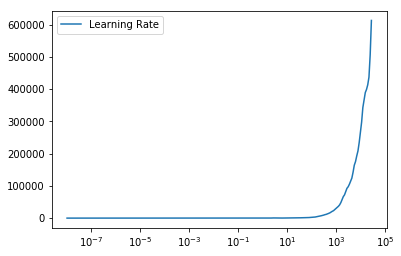

In [26]:
plt.semilogx(history.history['lr'], history.history['val_loss'])
plt.legend(['Learning Rate', 'Validation Loss'])

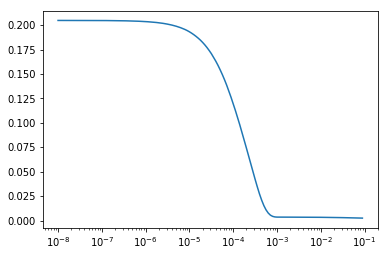

In [27]:
plt.semilogx(history.history['lr'][:140], history.history['loss'][:140])

Seems like 0.1 is the optimum learning rate

In [0]:
model = Sequential([Conv1D(filters=128, kernel_size=5, input_shape=(window_size, 1), strides=1, padding="causal", activation="tanh"),
                  Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="tanh"),
                  LSTM(128, return_sequences=True),
                  LSTM(128),
                  Dense(64, activation="tanh"),
                  Dense(64, activation="tanh"),
                  Dense(1)])


In [29]:
optimizer = SGD(lr=0.1, momentum=0.9)
model.compile(loss=Huber(),
             optimizer=optimizer,
             metrics=['mae'])
history = model.fit(X_train_reshape, y_train_reshape, batch_size=256, epochs=250, validation_data=(X_test_reshape, y_test_reshape))

Train on 1824 samples, validate on 457 samples
Epoch 1/250
1824/1824 [==============================] - 6s 3ms/step - loss: 0.0619 - mean_absolute_error: 0.2973 - val_loss: 0.0458 - val_mean_absolute_error: 0.2763
Epoch 2/250
1824/1824 [==============================] - 5s 3ms/step - loss: 0.0222 - mean_absolute_error: 0.1773 - val_loss: 0.0093 - val_mean_absolute_error: 0.1076
Epoch 3/250
1824/1824 [==============================] - 5s 2ms/step - loss: 0.0113 - mean_absolute_error: 0.1163 - val_loss: 0.0210 - val_mean_absolute_error: 0.1745
Epoch 4/250
1824/1824 [==============================] - 4s 2ms/step - loss: 0.0080 - mean_absolute_error: 0.1008 - val_loss: 0.0087 - val_mean_absolute_error: 0.1039
Epoch 5/250
1824/1824 [==============================] - 4s 2ms/step - loss: 0.0047 - mean_absolute_error: 0.0755 - val_loss: 0.0100 - val_mean_absolute_error: 0.1098
Epoch 6/250
1824/1824 [==============================] - 5s 2ms/step - loss: 0.0041 - mean_absolute_error: 0.0665 - va

In [0]:
y_pred_train_keras = scaler.inverse_transform(model.predict(X_train_reshape, batch_size=256))
y_pred_keras = scaler.inverse_transform(model.predict(X_test_reshape, batch_size=256))

Lets plot the predictions

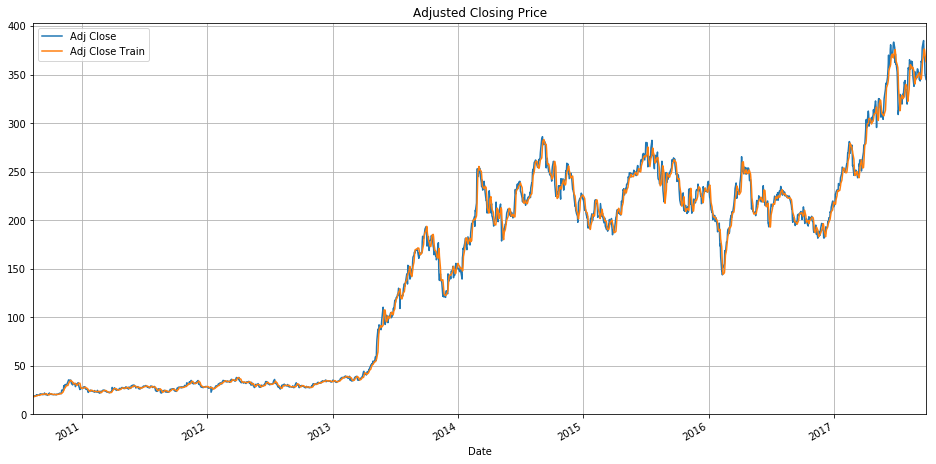

In [31]:
df_keras = df.copy()
df_keras.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_keras = df_keras.iloc[window_size:ind_split]
df_keras['Adj Close Train'] = y_pred_train_keras[:-window_size]
df_keras.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

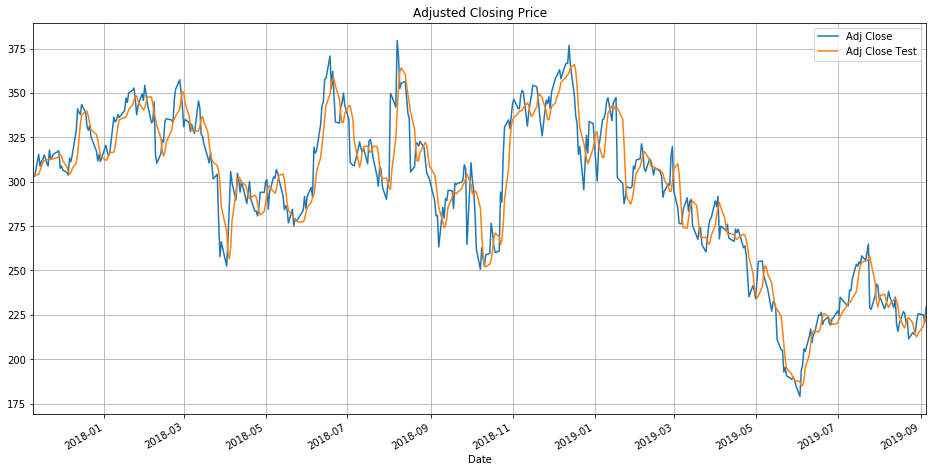

In [32]:
# Same for the test
df_keras = df.copy()
df_keras.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_keras = df_keras.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_keras['Adj Close Test'] = y_pred_keras
df_keras.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)